<a href="https://colab.research.google.com/github/jenimathew2001/BigData-Lab1/blob/main/GIT_CRYPTOCURRENCY_PRED_LSTM_MODEL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM MODEL FOR CRYPTOCURRENCY RANGE PREDICTION

The code is divided into sections; run the sections according to the data you want to use; for example, if you want to use daily data, run only that section; if you want to use weekly data, run only the weekly data section and avoid the daily data section; Similarly, just one of the four and one parameter sections should be selected.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM , Dropout,LeakyReLU
from tensorflow.keras.metrics import MeanSquaredError
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler #scale data betn 0 to 1
import datetime as dt
from datetime import timezone
import pytz
from tensorflow import keras
import pandas_datareader as web
import io
from google.colab import files
import random as rd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from datetime import datetime

UPLOADING DATA

bit is if bitcoin data is being uploaded , eth if ethereum data is being uploaded

In [3]:
data_COIN = pd.read_csv('/content/drive/MyDrive/Data/coin_Bitcoin.csv')

DAILY DATA AND WEEKLY DATA

The data uploaded is on daily basis , now using that data we have to form a data based on weekly basis.


# DAILY DATA
Run this section only if daily data was selected

In [4]:
data = data_COIN

# WEEKLY DATA
Run this section only if weekly data was selected. (If you've previously ran the daily data section, then skip this section)

Only run one cell from the second and third cells; read the comment on each cell to see which cell you must run.

In [ ]:
week_data = []
for index,row in data_COIN.iterrows():
  day =  datetime.strptime(row["Date"], "%Y-%m-%d %H:%M:%S").weekday()
  #print(day.DayOfWeek())
  #print(day)
  week_data. append([day])
df = pd. DataFrame(week_data, columns=["Day"])
day_data = pd.concat([data_COIN, df], axis=1)

In [ ]:
#IF BITCOIN DATA WAS UPLOADED RUN THIS CELL

day_data = day_data.drop(labels=2990, axis=0)
day_data = day_data.drop(labels=2989, axis=0)


bit_weekly_data = []
for index,row in day_data.iterrows():
  if(row["Day"] == 0):
    mx = row["High"]
    mn = row["Low"]
    for i in range(0,7):
      mx = max(mx, day_data.iloc[index+i]["High"])
      mn = min(mn, day_data.iloc[index+i]["Low"])
    bit_weekly_data.append([row["Date"], row["Open"], day_data.iloc[index+6]["Close"], mn, mx])
bit_weekly_data.append([data_COIN.iloc[2989]["Date"], data_COIN.iloc[2989]["Open"], data_COIN.iloc[2990]["Close"], data_COIN.iloc[2989]["Low"], data_COIN.iloc[2989]["High"]])
bit_weekly_data = pd.DataFrame(bit_weekly_data , columns = ["Date","Open","Close","Low","High"])
weekly_data = bit_weekly_data

In [ ]:
data = weekly_data #C

# **DATA PREPROCESSING**

Adding a range column into the data

In [5]:
y=[]
y = data['High'] - data['Low']
y = pd.DataFrame(y , columns = ["Range"])
data = pd.concat([data, y], axis=1)
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Range
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,13.488007
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,12.879990
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,32.169998
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,33.318100
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,29.028000
...,...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,1168.907919
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,1506.563363
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,1541.089690
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,2070.683396


Visualize the data (Range vs date)

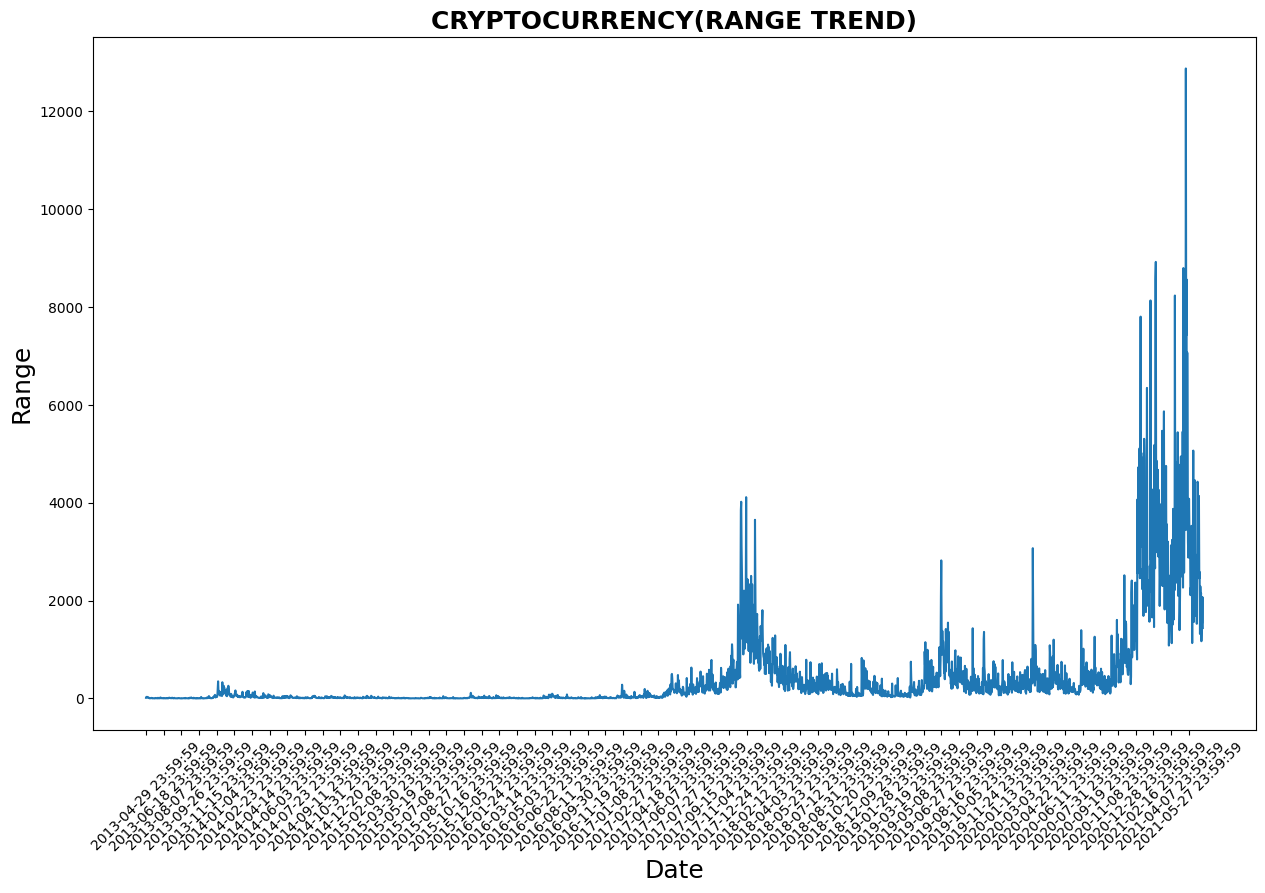

In [6]:
range_1 = data[['Range']] #target data
#Plotting the price for the historical data of bitcoin
plt.figure(figsize = (15,9))
plt.plot(range_1)
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=45)
plt.title("CRYPTOCURRENCY(RANGE TREND)",fontsize=18, fontweight="bold")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Range",fontsize=18)
plt.show()

# **DATA SPLITTING**

4 PARAMETER AND 1 PARAMETER

Below are two sections , if going for 4 input parameter go with the first 4 parameter section or if going for 1 input parameter skip the first section and go for 1 parameter

# 4 PARAMETER
Run this section only if you want to get a 4 parameter model

Only run one cell from each of the first and second cells; if using weekly data, run the first cell; if using daily data, avoid the first cell and run the second; read the comments on each cell to gain a better sense.

In [ ]:
# RUN THIS CELL IF YOU SELECTED WEEKLY DATA

# Storing Range into y_data that is output
data.pop('Range')

# Storing open,close,high,low into x_data that is input
x_data = data
del x_data['Date']
y_data = range_1

In [ ]:
# RUN THIS CELL IF YOU SELECTED DAILY DATA
y_data = range_1
x_data = data
x_data.pop('Range')
del x_data['SNo']
del x_data['Symbol']
del x_data['Date']
del x_data['Volume']
del x_data['Marketcap']
del x_data['Name']
y_data = pd. DataFrame(y_data, columns=["Range"])
y_data

In [ ]:
x_data

NORMALIZATION

In [ ]:
#Normalization
min_max_scaler = MinMaxScaler(feature_range=(0,1))#this by default returns the value between 0-10.
x_data= min_max_scaler.fit_transform(x_data.values)#fitting these values
y_data= min_max_scaler.fit_transform(y_data.values)#fitting these values

DATA SPLITTING

In [ ]:
#SPLITTING D ATASET

def univariate_data(x_dataset, y_dataset ,start_index, end_index, history_size, target_size):
  data = []
  labels = []
  #print( start_index, end_index, history_size, target_size) #0 2392 30 0 , 2392 None 30 0
  start_index = start_index + history_size
  #print(start_index)#30 , 2422
  if end_index is None:
    end_index = len(x_dataset) - target_size
    #print(end_index,"=",len(x_dataset),"-",target_size)#, 2991 = 2991 - 0
  for i in range(start_index, end_index):
    #print(start_index, end_index) #30 2392 , 2422 2991
    #print(i) #30-2391 , 2422 - 2990
    indices = range(i-history_size, i)
    #print(indices," =", range(i-history_size, i)) # range(0, 30)   - range(2361, 2391)   , range(2392, 2422)  - range(2960, 2990)
    # Reshape data from (history_size,) to (history_size, 1)
    #print(np.reshape(dataset[indices], (history_size, 1)))
    data.append(np.reshape(x_dataset[indices], (history_size, 4)))
    labels.append(y_dataset[i+target_size])
    #if(indices[1]<100):
       #print(indices,'indices',dataset[indices])
       #print(i+target_size,'label-indice',dataset[i+target_size])
  return np.array(data), np.array(labels)

past_history = 5#2-9,10-20,21-30
future_target = 0
#we need to use 5 days of data to learn to predict the next point in the time series ‘future_target’.
TRAIN_SPLIT = int(len(x_data) * 0.8)#Last index of the 80% data used for training.
x_train, y_train = univariate_data(x_data,y_data,
                                   0,
                                   TRAIN_SPLIT,
                                   past_history,
                                   future_target)
x_test, y_test = univariate_data(x_data,y_data,
                                 TRAIN_SPLIT,
                                 None,
                                 past_history,
                                 future_target)

In [ ]:
y_train[0]


array([0.00174898])

# 1 PARAMETER MODEL
Run this section only if you want to get a 1 parameter model (If you've previously ran the 4 parameter section, then skip this section)

NORMALIZING

In [7]:
#Normalizing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()#this by default returns the value between 0-10.
norm_data= min_max_scaler.fit_transform(range_1.values)#fitting these values

SPLITTING THE DATA

In [8]:
# SPLITTING DATA

def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []
  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size
  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

past_history = 25
future_target = 0
#we need to use 5 days of data to learn to predict the next point in the time series ‘future_target’.
TRAIN_SPLIT = int(len(norm_data) * 0.8)#Last index of the 80% data used for training.
x_train, y_train = univariate_data(norm_data,
                                   0,
                                   TRAIN_SPLIT,
                                   past_history,
                                   future_target)
x_test, y_test = univariate_data(norm_data,
                                 TRAIN_SPLIT,
                                 None,
                                 past_history,
                                 future_target)

# **BUILDING AND TRAINING THE MODEL**

BUILD THE MODEL

In [9]:
# BUILD THE MODEL

num_units = 64#Number of neurons
learning_rate = 0.0001
activation_function = 'sigmoid'
adam = Adam(learning_rate=learning_rate)
loss_function = 'mse'
batch_size = 10
num_epochs = 1000
#NUMBER OF INPUT PARAMETERS
# for four imput parameter  N = 4 and for one input parameter
N = 1 #C

# Initialize the RNN
model = Sequential()
#In Keras we can simply stack multiple layers on top of each other, for this we need to initialize the model as Sequential().
model.add(LSTM(units = num_units, activation=activation_function, input_shape=(None, N)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
#This layer will help to prevent overfitting by ignoring randomly selected neurons during training, and hence reduces the sensitivity to the specific weights of individual neurons.
model.add(Dense(units = 1))#fully conneceted layer

# Compiling the RNN
model.compile(optimizer=adam, loss=loss_function)

TRAINING THE MODEL

In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=False
)

Epoch 1/1000
213/213 [==============================] - 4s 12ms/step - loss: 0.0231 - val_loss: 0.0033
Epoch 2/1000
213/213 [==============================] - 3s 14ms/step - loss: 0.0198 - val_loss: 0.0028
Epoch 3/1000
213/213 [==============================] - 2s 11ms/step - loss: 0.0177 - val_loss: 0.0012
Epoch 4/1000
213/213 [==============================] - 2s 10ms/step - loss: 0.0154 - val_loss: 0.0021
Epoch 5/1000
213/213 [==============================] - 2s 10ms/step - loss: 0.0149 - val_loss: 0.0013
Epoch 6/1000
213/213 [==============================] - 2s 10ms/step - loss: 0.0129 - val_loss: 0.0014
Epoch 7/1000
213/213 [==============================] - 2s 11ms/step - loss: 0.0127 - val_loss: 0.0016
Epoch 8/1000
213/213 [==============================] - 3s 14ms/step - loss: 0.0107 - val_loss: 0.0024
Epoch 9/1000
213/213 [==============================] - 2s 11ms/step - loss: 0.0100 - val_loss: 0.0019
Epoch 10/1000
213/213 [==============================] - 2s 10ms/step - l

# **MODEL EVALUATION**

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize = (15,9))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))
sns.set(rc={'figure.figsize':(11.7+2,8.27+2)})
ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color='tomato')
ax.set_title('Bitcoin price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Range", size = 14)
ax.set_xticklabels('', size=10)

In [ ]:
#xgb_accuracy = round((accuracy_score(y_test, predictions) * 100), 2)
test_loss  = model.evaluate(x = x_test,y = y_test,verbose=1)
print('Test loss is : ',test_loss)

In [ ]:
def testing_data(model, x_test, y_test, save_figure):
  fig = plt.figure(figsize=(4, 4))
  ax_1 = plt.axes([0,0,1,0.8])
  ax_2 = plt.axes([0, 0.8, 1, 0.2])

  plt.ioff()
  y_pred = model.predict(x_test)  ## Predicting y_test output
  ax_1.grid('major')
  ax_1.plot([0, 1], [0,1], color = 'gray')
  ax_1.scatter(y_test, y_pred , color = 'orangered')
  ax_1.set_xlabel('y_test')
  ax_1.set_ylabel('y_pred')

  ax_2.axis('off')
  ax_2.text(0,0.55, ('MSE : ' + str(round(model.evaluate(x_test, y_test), 6))), fontsize = 13)
  if save_figure == True:
    fig_name = str(modelFit_time) + ' Test result.png'                             ## Change a to modelFit_time
    plt.savefig(fig_name, dpi = 300, bbox_inches ='tight')
    files.download(fig_name)
testing_data(model, x_test, y_test, False)